In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf

# Import Dataset

In [2]:
df = pd.read_csv("./data/airline.csv", index_col="Date", parse_dates=["Date"])
df.head()

,passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


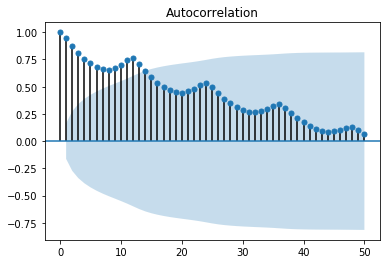

In [3]:
plot_acf(df.passengers, lags=50);

# Forecasting Method

- Naive
- Simple Moving Average
- Holt Winterz
- ARIMA

## Naive Method

In [4]:
df_forecasted = df.copy()
df_forecasted["naive_method"] = df.shift(1)
df_forecasted.head()

,passengers,naive_method
Date,,
1949-01-01,112,NaN
1949-02-01,118,112.0
1949-03-01,132,118.0
1949-04-01,129,132.0
1949-05-01,121,129.0


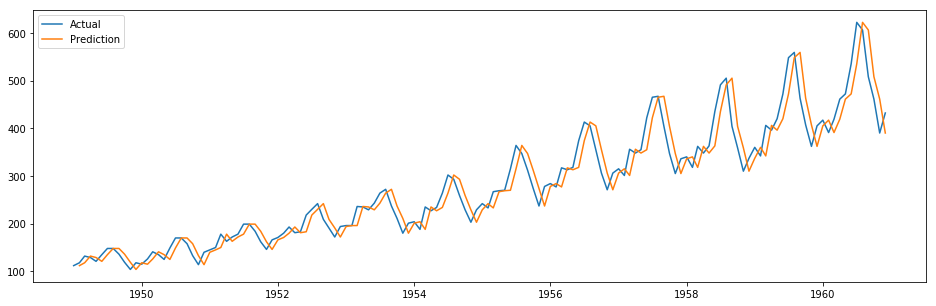

In [5]:
plt.figure(figsize=(16, 5))
plt.plot(df_forecasted.index, df_forecasted.passengers, label="Actual")
plt.plot(df_forecasted.index, df_forecasted.naive_method, label="Prediction")
plt.legend()

In [6]:
df_forecasted.dropna(inplace=True)
mean_absolute_error(df_forecasted.passengers, df_forecasted.naive_method)

25.86013986013986

## Simple Moving Average

In [7]:
df_forecasted = df.copy()
df_forecasted["t-1"] = df.shift(1)
df_forecasted["t-2"] = df.shift(2)
df_forecasted["t-3"] = df.shift(3)
df_forecasted["sma"] = df_forecasted.apply(lambda x: np.mean([x["t-1"], x["t-2"], x["t-3"]]), axis=1)
df_forecasted.head()

,passengers,t-1,t-2,t-3,sma
Date,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,112.0,NaN,NaN,NaN
1949-03-01,132,118.0,112.0,NaN,NaN
1949-04-01,129,132.0,118.0,112.0,120.666667
1949-05-01,121,129.0,132.0,118.0,126.333333


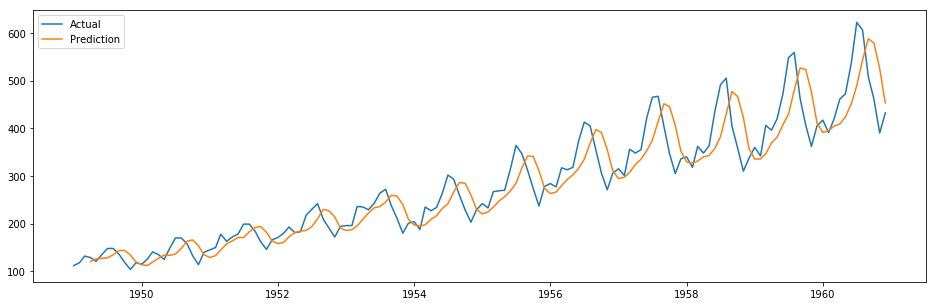

In [8]:
plt.figure(figsize=(16, 5))
plt.plot(df_forecasted.index, df_forecasted.passengers, label="Actual")
plt.plot(df_forecasted.index, df_forecasted.sma, label="Prediction")
plt.legend();

In [9]:
df_forecasted.dropna(inplace=True)
mean_absolute_error(df_forecasted.passengers, df_forecasted.sma)

36.14420803782506

## Simple Exponential Smoothing

This method is suitable for forecasting data with no clear trend or seasonal pattern

In [10]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

In [11]:
model = SimpleExpSmoothing(df.passengers)
model_fit = model.fit(smoothing_level=0.5)
last_month_predicted = model_fit.predict(start=df.tail(100).index[0], end=df.tail(100).index[-1])
last_month_actual = df.tail(100)
mean_absolute_error(last_month_actual, last_month_predicted)

/Users/muhammadramadiansyah/miniconda3/envs/jcop/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/muhammadramadiansyah/miniconda3/envs/jcop/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


38.11513832323558

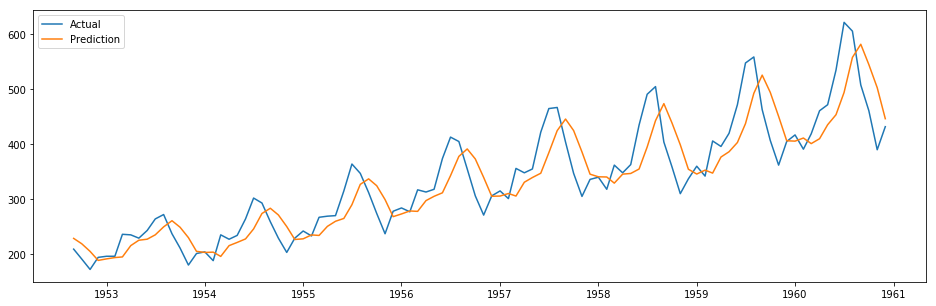

In [12]:
plt.figure(figsize=(16, 5))
plt.plot(last_month_actual.index, last_month_actual, label="Actual")
plt.plot(last_month_predicted.index, last_month_predicted, label="Prediction")
plt.legend();

# Double Exponential Smoothing

Holt (1957) extended simple exponential smoothing to allow the forecasting of data with a trend

In [13]:
model = ExponentialSmoothing(df.passengers, trend='add', seasonal=None)
model_fit = model.fit(smoothing_slope=0.01)
last_month_predicted = model_fit.predict(start=df.tail(100).index[0], end=df.tail(100).index[-1])
last_month_actual = df.tail(100)
mean_absolute_error(last_month_actual, last_month_predicted)

/Users/muhammadramadiansyah/miniconda3/envs/jcop/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/muhammadramadiansyah/miniconda3/envs/jcop/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


31.49018119160435

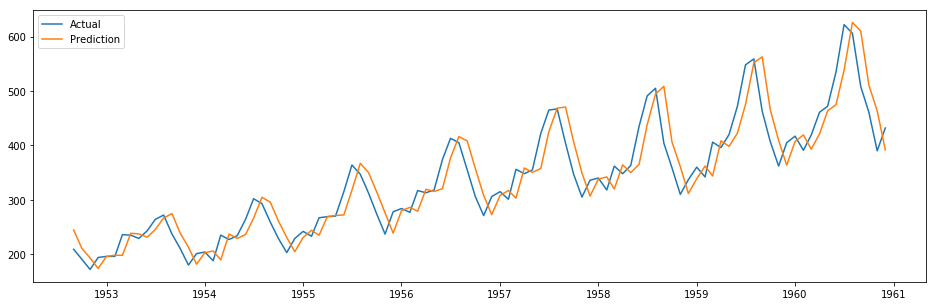

In [14]:
plt.figure(figsize=(16, 5))
plt.plot(last_month_actual.index, last_month_actual, label="Actual")
plt.plot(last_month_predicted.index, last_month_predicted, label="Prediction")
plt.legend();

# Triplet Exponential Smoothing

Holt (1957) and Winters (1960) extended Holt’s method to capture seasonality

In [15]:
model = ExponentialSmoothing(df.passengers, trend='add', seasonal="mul", seasonal_periods=12)
model_fit = model.fit(smoothing_seasonal=0.65)
last_month_predicted = model_fit.predict(start=df.tail(100).index[0], end=df.tail(100).index[-1])
last_month_actual = df.tail(100)
mean_absolute_error(last_month_actual, last_month_predicted)

/Users/muhammadramadiansyah/miniconda3/envs/jcop/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/muhammadramadiansyah/miniconda3/envs/jcop/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


8.858662106366952

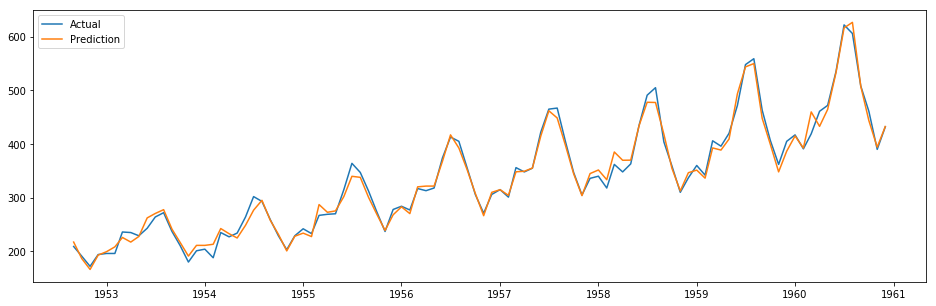

In [16]:
plt.figure(figsize=(16, 5))
plt.plot(last_month_actual.index, last_month_actual, label="Actual")
plt.plot(last_month_predicted.index, last_month_predicted, label="Prediction")
plt.legend();

# ARIMA

- AR: Autoregressive models
- I: Integrated
- MA: Moving average models

##  Stationarity and differencing

A stationary time series is one whose properties do not depend on the time at which the series is observed. Thus, time series with trends, or with seasonality, are not stationary the trend and seasonality will affect the value of the time series at different times. On the other hand, a white noise series is stationary it does not matter when you observe it, it should look much the same at any point in time.

In [17]:
from statsmodels.tsa.stattools import adfuller

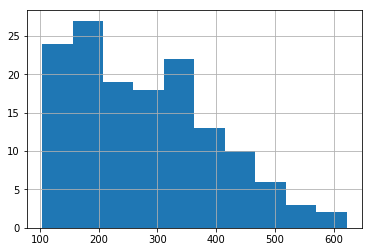

In [18]:
df.passengers.hist()

# Augmented Dickey-Fuller (ADF) test
Another way to determine more objectively if differencing is required is to use a unit root test and one of the most popular test is the Augmented Dickey-Fuller (ADF) test.

jika score p-value > 0.05, maka itu non statitioner

In [19]:
adfuller(df.passengers)[1]

0.9918802434376409

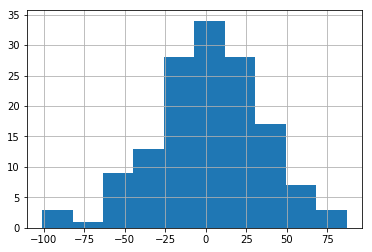

In [20]:
df.passengers.diff().dropna().hist();

In [21]:
adfuller(df.passengers.diff().dropna())[1]

0.05421329028382711

In [22]:
adfuller(df.passengers.diff().dropna().diff().dropna())[1]

2.7328918500142026e-29

In [23]:
passengers = df.passengers.diff().dropna()# Detrending and Deseasonality

## AR: Autoregressive models

In a multiple regression model, we forecast the variable of interest using a linear combination of predictors. In an autoregression model, we forecast the variable of interest using a linear combination of past values of the variable

In [24]:
from statsmodels.tsa.arima_model import ARMA

In [25]:
AR = ARMA(passengers, order=(0, 0))
model = AR.fit()
print(f"AIC: {model.aic}, BIC: {model.bic}")

AIC: 1415.2775866746063, BIC: 1421.2032759351262


/Users/muhammadramadiansyah/miniconda3/envs/jcop/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/muhammadramadiansyah/miniconda3/envs/jcop/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


In [26]:
AR = ARMA(passengers, order=(4, 0))
model = AR.fit()
print(f"AIC: {model.aic}, BIC: {model.bic}")

AIC: 1388.5099984631122, BIC: 1406.2870662446717


/Users/muhammadramadiansyah/miniconda3/envs/jcop/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


### Using PACF Plot

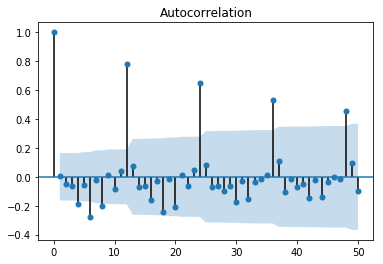

In [27]:
plot_acf(model.resid, lags=50);

In [28]:
from statsmodels.graphics.tsaplots import plot_pacf

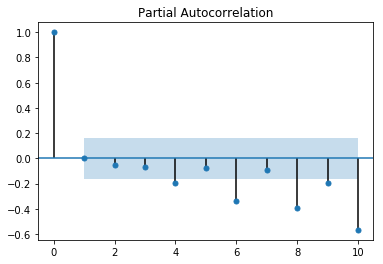

In [29]:
plot_pacf(model.resid, lags=10);

In [30]:
for p in range(1, 5):
    AR = ARMA(passengers, order=(p, 0))
    model = AR.fit()
    print(f"p: {p}, AIC: {model.aic}, BIC: {model.bic}")

/Users/muhammadramadiansyah/miniconda3/envs/jcop/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/muhammadramadiansyah/miniconda3/envs/jcop/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/muhammadramadiansyah/miniconda3/envs/jcop/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/muhammadramadiansyah/miniconda3/envs/jcop/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


p: 1, AIC: 1403.472860958022, BIC: 1412.3613948488016
p: 2, AIC: 1397.975152179567, BIC: 1409.8265307006066
p: 3, AIC: 1396.1510490692874, BIC: 1410.965272220587
p: 4, AIC: 1388.5099984631122, BIC: 1406.2870662446717


## Moving Average

In [31]:
MA = ARMA(passengers, order=(0, 0))
model = MA.fit()
print(f"AIC: {model.aic}, BIC: {model.bic}")

AIC: 1415.2775866746063, BIC: 1421.2032759351262


/Users/muhammadramadiansyah/miniconda3/envs/jcop/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


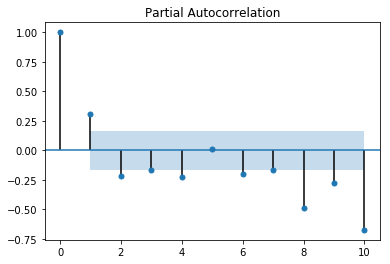

In [32]:
plot_pacf(model.resid, lags=10);

In [33]:
MA = ARMA(passengers, order=(0, 4))
model = MA.fit()
print(f"AIC: {model.aic}, BIC: {model.bic}")

/Users/muhammadramadiansyah/miniconda3/envs/jcop/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


AIC: 1357.3148898627114, BIC: 1375.091957644271


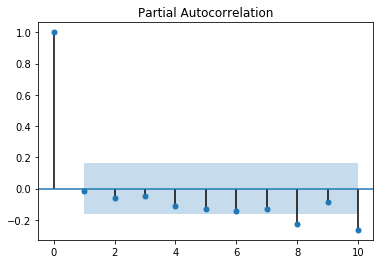

In [34]:
plot_pacf(model.resid, lags=10);

In [35]:
for q in range(1, 5):
    MA = ARMA(passengers, order=(1, q))
    model = MA.fit()
    print(f"q: {q}, AIC: {model.aic}, BIC: {model.bic}")

/Users/muhammadramadiansyah/miniconda3/envs/jcop/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/muhammadramadiansyah/miniconda3/envs/jcop/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/muhammadramadiansyah/miniconda3/envs/jcop/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


q: 1, AIC: 1402.145399802001, BIC: 1413.9967783230406
q: 2, AIC: 1371.8153739096988, BIC: 1386.6295970609983
q: 3, AIC: 1373.0757022073535, BIC: 1390.852769988913
q: 4, AIC: 1359.166601328296, BIC: 1379.9065137401155


/Users/muhammadramadiansyah/miniconda3/envs/jcop/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


## ARIMA

In [36]:
from statsmodels.tsa.arima_model import ARIMA

In [37]:
arima = ARIMA(df.passengers, order=(4, 1, 4))
model = arima.fit()
last_month_predicted = model.predict(start=df.tail(100).index[0], end=df.tail(100).index[-1], typ="levels")
last_month_actual = df.tail(100)
print(f"AIC: {model.aic}, BIC: {model.bic}")
print(f"MAE: {mean_absolute_error(last_month_actual, last_month_predicted)}")

/Users/muhammadramadiansyah/miniconda3/envs/jcop/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/muhammadramadiansyah/miniconda3/envs/jcop/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


AIC: 1332.9549926333386, BIC: 1362.5834389359377
MAE: 21.30031178683458


/Users/muhammadramadiansyah/miniconda3/envs/jcop/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


/Users/muhammadramadiansyah/miniconda3/envs/jcop/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


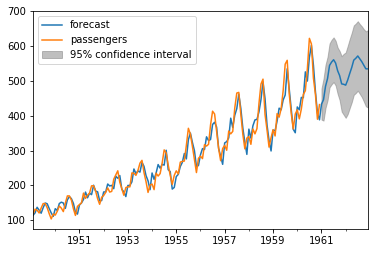

In [38]:
model.plot_predict(end=len(passengers) + 24);

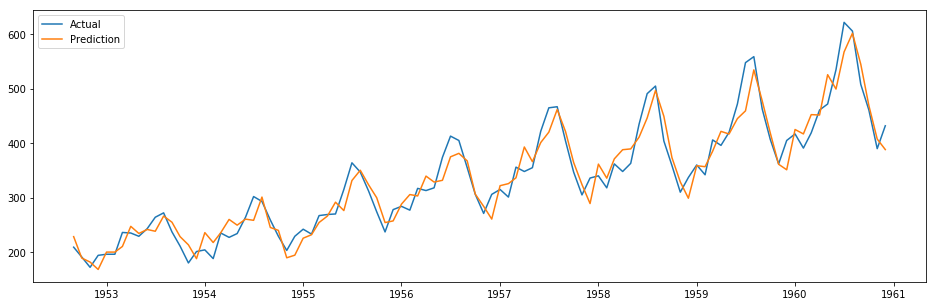

In [39]:
plt.figure(figsize=(16, 5))
plt.plot(last_month_actual.index, last_month_actual, label="Actual")
plt.plot(last_month_predicted.index, last_month_predicted, label="Prediction")
plt.legend();

# Problem with ARIMA

It does not support seasonal data. That is a time series with a repeating cycle.



# What is SARIMA?

Seasonal Autoregressive Integrated Moving Average, SARIMA or Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.

In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [41]:
my_order = (0, 1, 1)
my_seasonal_order = (1, 1, 2, 12)
# define model
sarimax = SARIMAX(df.passengers, order=my_order, seasonal_order=my_seasonal_order)
model = sarimax.fit()
last_month_predicted = model.predict(start=df.tail(100).index[0], end=df.tail(100).index[-1], typ="levels")
last_month_actual = df.tail(100)
print(f"AIC: {model.aic}, BIC: {model.bic}")
print(f"MAE: {mean_absolute_error(last_month_actual, last_month_predicted)}")

/Users/muhammadramadiansyah/miniconda3/envs/jcop/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/muhammadramadiansyah/miniconda3/envs/jcop/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


AIC: 1012.9907973129934, BIC: 1027.3667839289992
MAE: 8.946686020917356


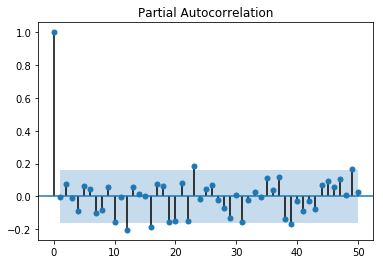

In [42]:
plot_pacf(model.resid, lags=50);